In [39]:
# Importing Dependencies
import numpy as np
import os
import csv
import pandas as pd
import statistics as stat
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [27]:
# Import & compare file heads of our various CSVs. We'll use 2019.csv as our template and create new
# dataframes of off the rest to ensure the data is congruent.

csvpath_2015 = os.path.join('Resources', '2015.csv')
csvpath_2016 = os.path.join('Resources', '2016.csv')
csvpath_2017 = os.path.join('Resources', '2017.csv')
csvpath_2018 = os.path.join('Resources', '2018.csv')
csvpath_2019 = os.path.join('Resources', '2019.csv')
just_regions = pd.read_csv('happy_regions.csv')
csv_2015 = pd.read_csv(csvpath_2015)
csv_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
csv_2016 = pd.read_csv(csvpath_2016)
csv_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
csv_2017 = pd.read_csv(csvpath_2017)
csv_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [7]:
csv_2016 = pd.read_csv(csvpath_2016)

In [8]:
csv_2017 = pd.read_csv(csvpath_2017)

In [9]:
csv_2018 = pd.read_csv(csvpath_2018)

In [10]:
csv_2019 = pd.read_csv(csvpath_2019)

In [11]:
# 2019 & 2018 datasets are the same in structure & column naming convention.  Restructure / Rename
# datasets from 2015 - 2017.

# Convert / Fix 2017 Data

csv_2017_restructured = csv_2017[["Happiness.Rank",
                                  "Country",
                                  "Happiness.Score",
                                  "Economy..GDP.per.Capita.",
                                  "Family",
                                  "Health..Life.Expectancy.",
                                  "Freedom",
                                  "Generosity",
                                  "Trust..Government.Corruption."]]

csv_2017_restructured = csv_2017_restructured.rename(columns={"Happiness.Rank": "Overall rank",
                                      "Country": "Country or region",
                                      "Happiness.Score": "Score",
                                      "Economy..GDP.per.Capita.": "GDP per capita",
                                      "Family": "Social support",
                                      "Health..Life.Expectancy.": "Healthy life expectancy",
                                      "Freedom": "Freedom to make life choices",
                                      "Generosity": "Generosity",
                                      "Trust..Government.Corruption.": "Perceptions of corruption"})


In [12]:
# 2019 & 2018 datasets are the same in structure & column naming convention.  Restructure / Rename
# datasets from 2015 - 2017.

# Convert / fix 2016 Data

csv_2016_restructured = csv_2016[["Happiness Rank",
                                 "Country",
                                  "Happiness Score",
                                  "Economy (GDP per Capita)",
                                  "Family",
                                  "Health (Life Expectancy)",
                                  "Freedom",
                                  "Generosity",
                                  "Trust (Government Corruption)"]]

csv_2016_restructured = csv_2016_restructured.rename(columns={"Happiness Rank": "Overall rank",
                                      "Country": "Country or region",
                                      "Happiness Score": "Score",
                                      "Economy (GDP per Capita)": "GDP per capita",
                                      "Family": "Social support",
                                      "Health (Life Expectancy)": "Healthy life expectancy",
                                      "Freedom": "Freedom to make life choices",
                                      "Generosity": "Generosity",
                                      "Trust (Government Corruption)": "Perceptions of corruption"})

In [13]:
# 2019 & 2018 datasets are the same in structure & column naming convention.  Restructure / Rename
# datasets from 2015 - 2017.

# Convert / fix 2015 Data

csv_2015_restructured = csv_2015[["Happiness Rank",
                                 "Country",
                                  "Happiness Score",
                                  "Economy (GDP per Capita)",
                                  "Family",
                                  "Health (Life Expectancy)",
                                  "Freedom",
                                  "Generosity",
                                  "Trust (Government Corruption)"]]

csv_2015_restructured = csv_2015_restructured.rename(columns={"Happiness Rank": "Overall rank",
                                      "Country": "Country or region",
                                      "Happiness Score": "Score",
                                      "Economy (GDP per Capita)": "GDP per capita",
                                      "Family": "Social support",
                                      "Health (Life Expectancy)": "Healthy life expectancy",
                                      "Freedom": "Freedom to make life choices",
                                      "Generosity": "Generosity",
                                      "Trust (Government Corruption)": "Perceptions of corruption"})

In [14]:
#Add new "Year" column to each csv.
csv_2019["Year"] = 2019
csv_2018["Year"] = 2018
csv_2017_restructured["Year"] = 2017
csv_2016_restructured["Year"] = 2016
csv_2015_restructured["Year"] = 2015

In [15]:
#Combine 2015-2019 data into one csv.
csv_years_combined = csv_2015_restructured.append(csv_2016_restructured)
csv_years_combined = csv_years_combined.append(csv_2017_restructured)
csv_years_combined = csv_years_combined.append(csv_2018)
csv_years_combined = csv_years_combined.append(csv_2019)
csv_years_combined
#["Country or region"].value_counts()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
152,153,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
153,154,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
154,155,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


In [30]:
countries = []
countries.append(csv_years_combined["Country or region"])

csv_4meyear = csv_years_combined.groupby("Year")
csv_4me.mean()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Country or region,,,,,,,,,
Afghanistan,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.267730,0.058094,2017.0
Albania,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.167887,0.043201,2017.0
Algeria,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.069219,0.146099,2017.0
Angola,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2016.5
Argentina,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.092371,0.064308,2017.0
...,...,...,...,...,...,...,...,...,...
Venezuela,71.8,5.53140,1.052468,1.323264,0.683741,0.213709,0.057186,0.071444,2017.0
Vietnam,90.8,5.15460,0.723416,1.138384,0.722700,0.577207,0.195664,0.091921,2017.0
Yemen,146.4,3.62580,0.489313,0.865448,0.365440,0.244175,0.096929,0.067045,2017.0


In [29]:
countries = []
countries.append(csv_years_combined["Country or region"])

csv_4mecountry = csv_years_combined.groupby("Country or region")
csv_4me.mean()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Country or region,,,,,,,,,
Afghanistan,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.267730,0.058094,2017.0
Albania,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.167887,0.043201,2017.0
Algeria,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.069219,0.146099,2017.0
Angola,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2016.5
Argentina,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.092371,0.064308,2017.0
...,...,...,...,...,...,...,...,...,...
Venezuela,71.8,5.53140,1.052468,1.323264,0.683741,0.213709,0.057186,0.071444,2017.0
Vietnam,90.8,5.15460,0.723416,1.138384,0.722700,0.577207,0.195664,0.091921,2017.0
Yemen,146.4,3.62580,0.489313,0.865448,0.365440,0.244175,0.096929,0.067045,2017.0


In [35]:
regions = just_regions["Region"]
csv_4avg = csv_years_combined.join(regions)
csv_4avg

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Region
0,1,Switzerland,7.587,1.396510,1.349510,0.941430,0.665570,0.296780,0.419780,2015,Europe
0,1,Denmark,7.526,1.441780,1.163740,0.795040,0.579410,0.361710,0.444530,2016,Europe
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017,Europe
0,1,Finland,7.632,1.305000,1.592000,0.874000,0.681000,0.202000,0.393000,2018,Europe
0,1,Finland,7.769,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,2019,Europe
...,...,...,...,...,...,...,...,...,...,...,...
155,156,Burundi,2.905,0.091000,0.627000,0.145000,0.065000,0.149000,0.076000,2018,Middle East and Northern Africa
155,156,South Sudan,2.853,0.306000,0.575000,0.295000,0.010000,0.202000,0.091000,2019,Middle East and Northern Africa
156,157,Burundi,2.905,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620,2015,Sub-Saharan Africa
156,157,Burundi,2.905,0.068310,0.234420,0.157470,0.043200,0.202900,0.094190,2016,Sub-Saharan Africa


slope:0.29
intercept:-0.62
R-squared: 0.6230
y=0.29x + -0.62


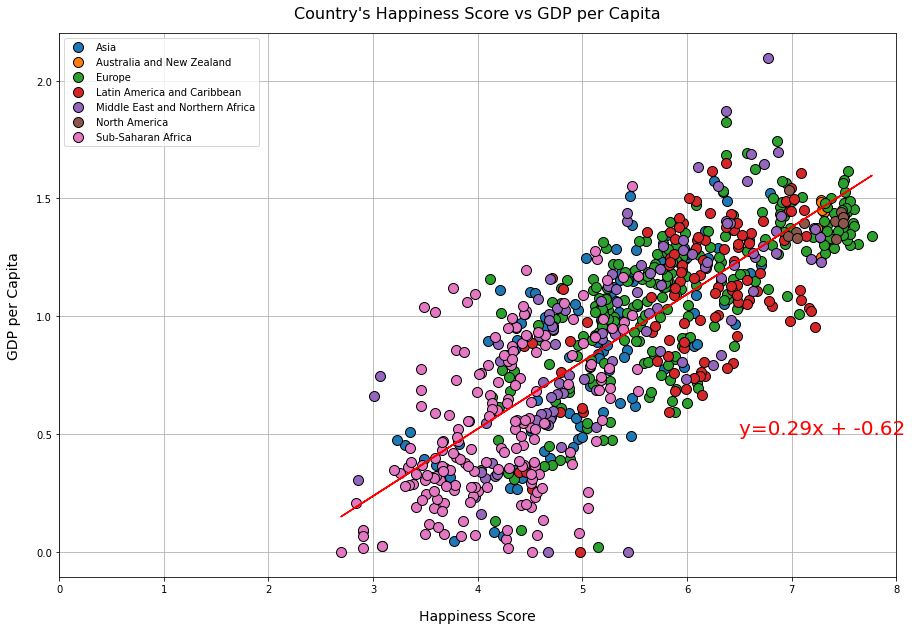

In [57]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_4avg["Score"]
y_values = csv_4avg["GDP per capita"]

#make df with all the vlaues I want to incorporate
country = csv_4avg["Country or region"]
region = csv_4avg["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.savefig("happy_v_gdp.jpg")
plt.show()

slope:0.19
intercept:0.06
R-squared: 0.4209
y=0.19x + 0.06


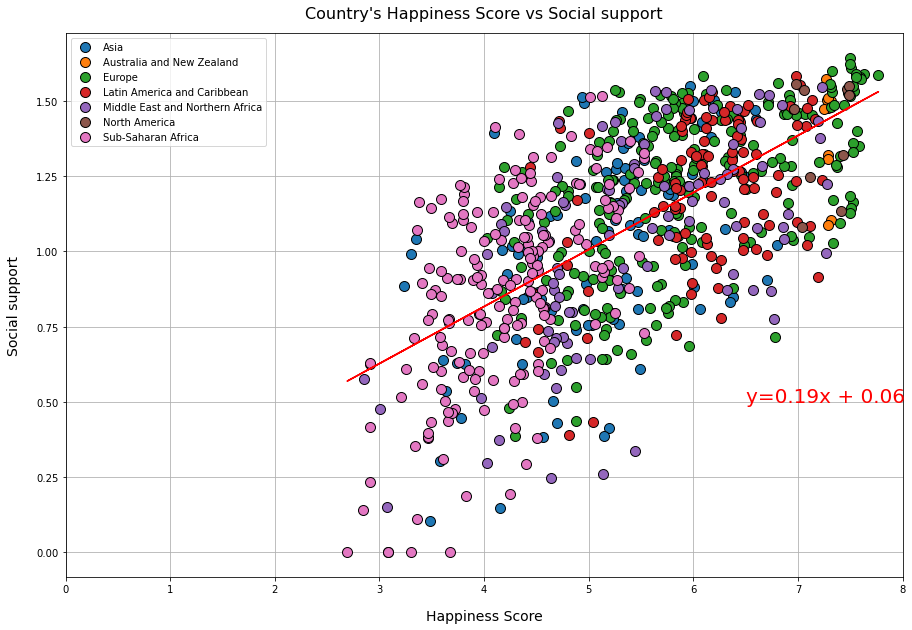

In [56]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_4avg["Score"]
y_values = csv_4avg["Social support"]

#make df with all the vlaues I want to incorporate
country = csv_4avg["Country or region"]
region = csv_4avg["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social support", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social support", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.savefig("happy_v_socialsupport.jpg")
plt.show()

slope:0.16
intercept:-0.27
R-squared: 0.5512
y=0.16x + -0.27


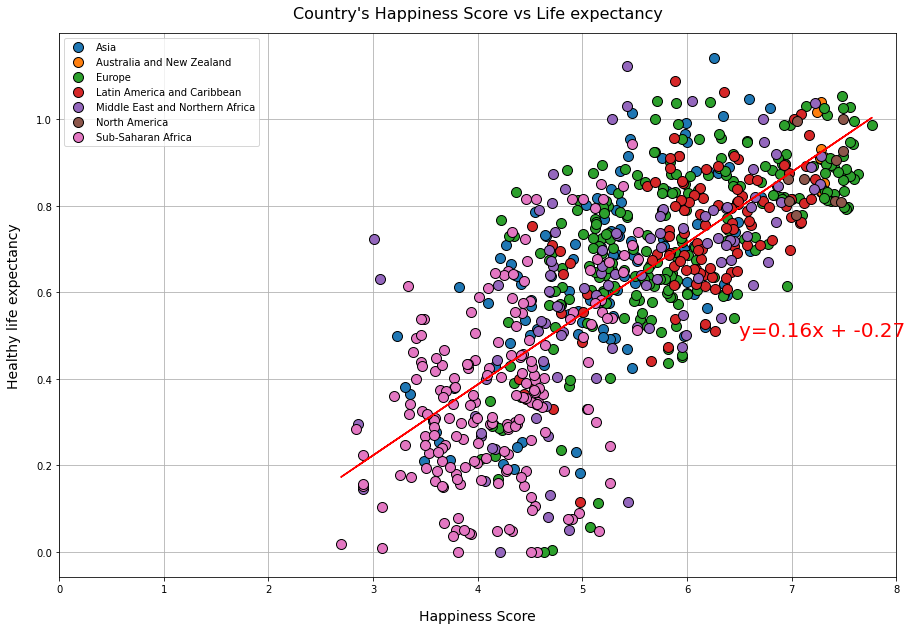

In [55]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_4avg["Score"]
y_values = csv_4avg["Healthy life expectancy"]

#make df with all the vlaues I want to incorporate
country = csv_4avg["Country or region"]
region = csv_4avg["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy life expectancy", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Life expectancy", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.savefig("happy_v_lifeexpectancy.jpg")
plt.show()

slope:0.07
intercept:0.01
R-squared: 0.3039
y=0.07x + 0.01


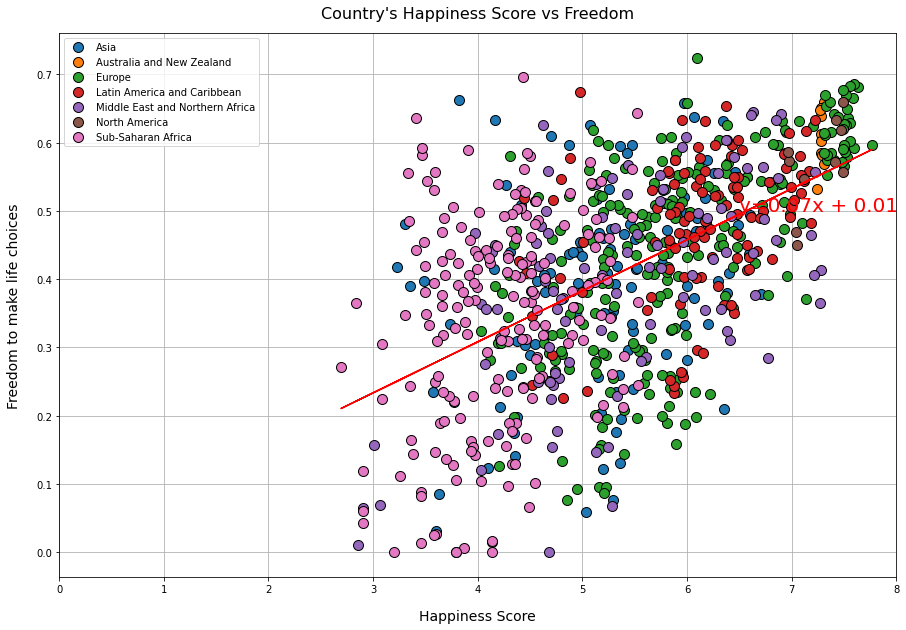

In [54]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_4avg["Score"]
y_values = csv_4avg["Freedom to make life choices"]

#make df with all the vlaues I want to incorporate
country = csv_4avg["Country or region"]
region = csv_4avg["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make life choices", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.savefig("happy_v_freedom.jpg")
plt.show()

slope:0.01
intercept:0.14
R-squared: 0.0189
y=0.01x + 0.14


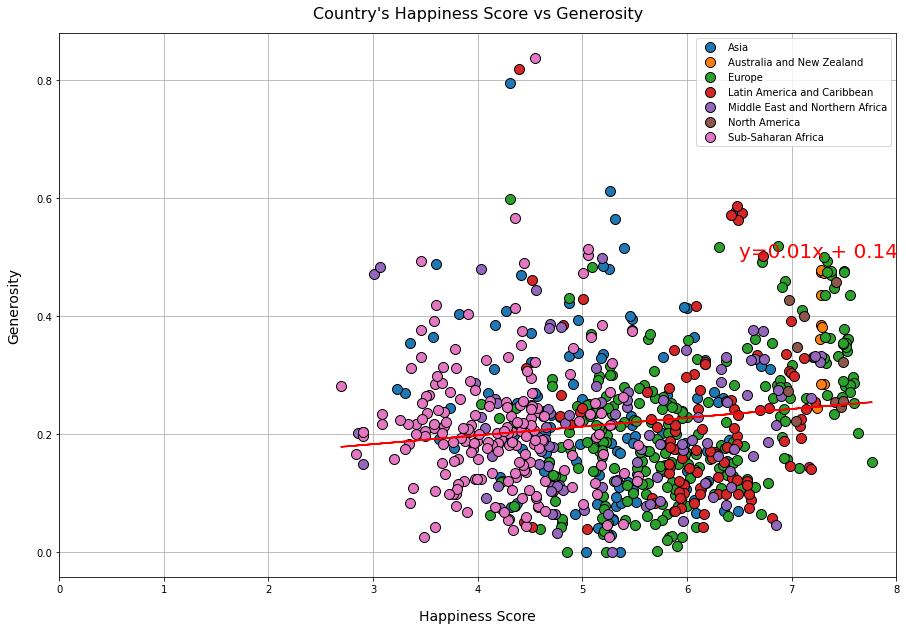

In [53]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_4avg["Score"]
y_values = csv_4avg["Generosity"]

#make df with all the vlaues I want to incorporate
country = csv_4avg["Country or region"]
region = csv_4avg["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.savefig("happy_v_gen.jpg")
plt.show()

slope:nan
intercept:nan
R-squared: nan
y=nanx + nan


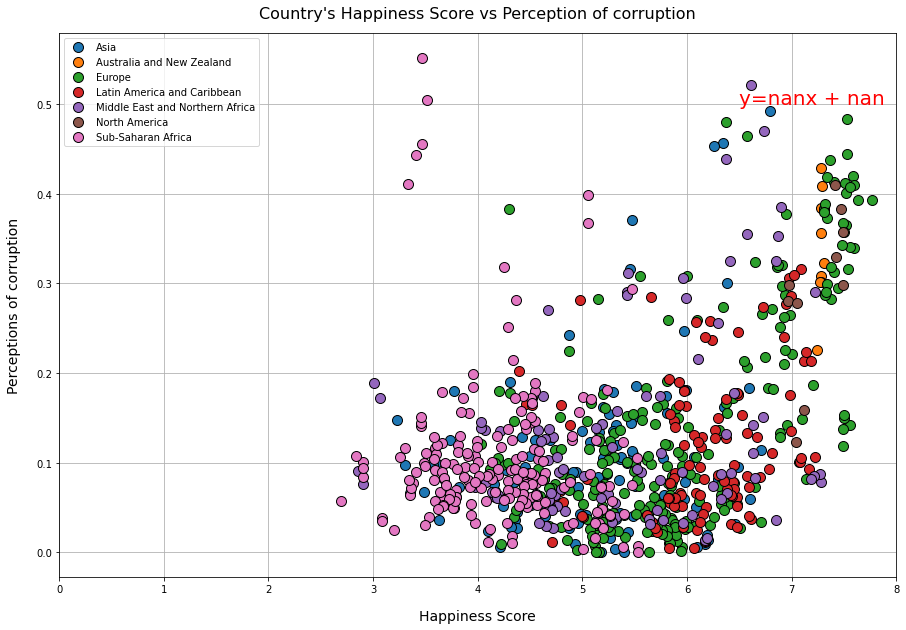

<Figure size 432x288 with 0 Axes>

In [52]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_4avg["Score"]
y_values = csv_4avg["Perceptions of corruption"]

#make df with all the vlaues I want to incorporate
country = csv_4avg["Country or region"]
region = csv_4avg["Region"]

#make dict for df
happy_dict={"Country": country,
                "Region": region,
                "X Values": x_values,
                "Y Values": y_values}

#make dict into df
happy_df = pd.DataFrame(happy_dict)

#groupby for better organization so we can plt
group_region =happy_df.groupby("Region")

#format size of figure before plotting 
plt.figure(figsize=(15,10))

#creat "for...in" that tells plt.plot to categorize plots by region and plot with colors
for index, group in group_region: 
    plt.plot(group["X Values"], group["Y Values"], marker="o", linestyle="", label=index, markersize=10, markeredgecolor="black")
    
    #create legend and add grid
    plt.legend()
    plt.grid()


#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perceptions of corruption", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of corruption", pad=15, fontsize=16)

#limits
plt.xlim(0,8)


#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()
plt.savefig("happy_v_corrup.jpg")